In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/hmeq-data/hmeq.csv


* **Data Mining e Machine Learning II** 
* Professor: MARCOS GUIMARÃES
* Aluna: Viviane Silvestre

# **Análises Exploratórias**

1. A análise exploratória serrá realizada para conhecer o conjunto de dados de modo a resumir as características do departamento de crédito de um banco. O objetivo é a automatizar o processo de tomada de decisão para aprovação das linhas de crédito do patrimonio líquido. Assim, seguindo as recomendações da Lei de Igualdade de Oportunidades de Crédito, será criado um modelo de pontuação derivado e estatisticamente sólido baseado nos dados coletados pelas conceções recentes de crédito através do processo atual. O modelo será construído a partir de ferramentas de modelagem preditiva. 

In [2]:
# Importação do conjunto de dados 
df= pd.read_csv('../input/hmeq-data/hmeq.csv')

In [3]:
# Verificando o Dataset
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,89000,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,89200,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,89800,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [4]:
# Verificando a imensão do Dataset
print(df.shape)

(5960, 13)


In [5]:
# Verificando os tipos de variáveis
df.dtypes


BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object

In [6]:
#Analises de estatísticas descritivas 
print(df.describe().T)

          count           mean           std          min           25%  \
BAD      5960.0       0.199497      0.399656     0.000000      0.000000   
LOAN     5960.0   18607.969799  11207.480417  1100.000000  11100.000000   
MORTDUE  5442.0   73760.817200  44457.609458  2063.000000  46276.000000   
VALUE    5848.0  101776.048741  57385.775334  8000.000000  66075.500000   
YOJ      5445.0       8.922268      7.573982     0.000000      3.000000   
DEROG    5252.0       0.254570      0.846047     0.000000      0.000000   
DELINQ   5380.0       0.449442      1.127266     0.000000      0.000000   
CLAGE    5652.0     179.766275     85.810092     0.000000    115.116702   
NINQ     5450.0       1.186055      1.728675     0.000000      0.000000   
CLNO     5738.0      21.296096     10.138933     0.000000     15.000000   
DEBTINC  4693.0      33.779915      8.601746     0.524499     29.140031   

                  50%            75%            max  
BAD          0.000000       0.000000       1.

O conjunto de dados possuir em seu maior número 5960 registros, no entanto, algumas variáveis possuem valores nulos, a variável DEBTINC possui 4693, sendo necessário utilizar técnicas para padronizar o conjunto de dados. Que podem ser imputação ou exclusão dos valores missings. 

In [7]:
# imprimindo os primeiros registros do Dataset
df.head(10)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


# **Tratando Missing**

O primeiro passo é verificar a quantidade de missings em cada tipo de variável e assim tomar a decisão de que tipo de técnica será utilizada para padronizar a base de dados. 

In [8]:
# verificando os valores missing nas variáveis númericas e categóricas
feat_missing = []

for f in df.columns:
    missings = df[f].isnull().sum()
    if missings > 0:
        feat_missing.append(f)
        missings_perc = missings/df.shape[0]
        
        # printing summary of missing values
        print('Variable {} has {} records ({:.2%}) with missing values'.format(f, missings, missings_perc))

# how many variables do present missing values?
print()
print('O total, de {} variáveis com valores missings'.format(len(feat_missing)))

Variable MORTDUE has 518 records (8.69%) with missing values
Variable VALUE has 112 records (1.88%) with missing values
Variable REASON has 252 records (4.23%) with missing values
Variable JOB has 279 records (4.68%) with missing values
Variable YOJ has 515 records (8.64%) with missing values
Variable DEROG has 708 records (11.88%) with missing values
Variable DELINQ has 580 records (9.73%) with missing values
Variable CLAGE has 308 records (5.17%) with missing values
Variable NINQ has 510 records (8.56%) with missing values
Variable CLNO has 222 records (3.72%) with missing values
Variable DEBTINC has 1267 records (21.26%) with missing values

O total, de 11 variáveis com valores missings


A analise demonstrou que a maior parte dos valores missings está na variável MOTDUE, que é a variável que possui o valor devido pelos clientes nas hipótecas. Como esses valores são muito diferentes, a decisão foi por excluir os valores missings, e assim analisar apenas os valores reais da base de dados. 

In [9]:
#dropping rows that have missing data
df.dropna(axis=0, how='any', inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 13 columns):
BAD        3364 non-null int64
LOAN       3364 non-null int64
MORTDUE    3364 non-null float64
VALUE      3364 non-null float64
REASON     3364 non-null object
JOB        3364 non-null object
YOJ        3364 non-null float64
DEROG      3364 non-null float64
DELINQ     3364 non-null float64
CLAGE      3364 non-null float64
NINQ       3364 non-null float64
CLNO       3364 non-null float64
DEBTINC    3364 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 367.9+ KB


A base de dados padronizada possui 3364 registros e 13 colunas, um conjunto de dados relativamente pequeno para aplicar modelos de predição. Assim vamos criar uma nova coluna que irá verificar se o valor atual da propriedade é maior ou menor que o valor devido da hipoteca. 
VALUE_MORTDUE = Valor da propriedade - valor da hipoteca

In [10]:
df['VALUE_MORTDUE'] = df['VALUE'] - df['MORTDUE']

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 14 columns):
BAD              3364 non-null int64
LOAN             3364 non-null int64
MORTDUE          3364 non-null float64
VALUE            3364 non-null float64
REASON           3364 non-null object
JOB              3364 non-null object
YOJ              3364 non-null float64
DEROG            3364 non-null float64
DELINQ           3364 non-null float64
CLAGE            3364 non-null float64
NINQ             3364 non-null float64
CLNO             3364 non-null float64
DEBTINC          3364 non-null float64
VALUE_MORTDUE    3364 non-null float64
dtypes: float64(10), int64(2), object(2)
memory usage: 394.2+ KB


# **Análise da Variável - Target (Preditora)**

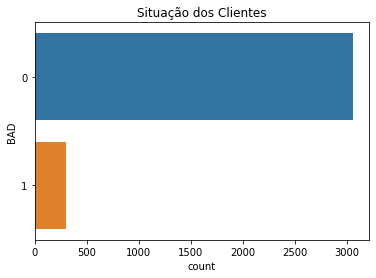

In [12]:
# Visualizações 
import seaborn as sns
import matplotlib.pyplot as plt
ax = sns.countplot(y='BAD', data=df).set_title("Situação dos Clientes")

A variável BAD "Target" verifica se o cliente está inadimplente
a resposta 1 = Inadimplete e 0 = Pagamento em Dia
O gráfico demonstrou que a maioria dos clientes estão em dia com o pagamento.

In [13]:
#Analise do Dataset
import pandas
from pandas.plotting import scatter_matrix
from matplotlib import pyplot

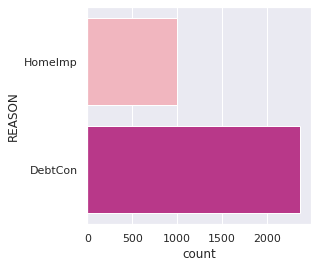

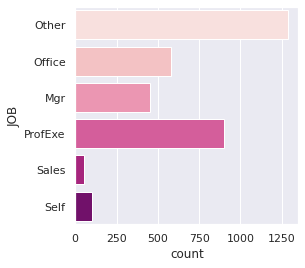

In [14]:
# Visualização em Gráficos das variáveis categórias
sns.set( rc = {'figure.figsize': (4, 4)})
fcat = ['REASON','JOB']

for col in fcat:
    plt.figure()
    sns.countplot(y=df[col], data=df, palette="RdPu")
    plt.show()

**Análises dos gráficos 
Reason**
1. DebtCon = debt consolidation = Consolidação da Dívida
1. HomeImp = home improvement - Melhoria na casa
A análise demonstrou que a maior parte dos clientes tiveram a dívida consolidade e que apenas 1000 clientes fizeram melhorias no imóvel.

**Job
1. Refere-se a Seix Categorias Ocupacionais** 
Other, Office, Mgr, ProfExe, Sales, Self
A maioria dos clientes não se enquandraram nas categorias e classificaram a ocupação como outras, a maior parte são ProfExe, Office e Mgr. 



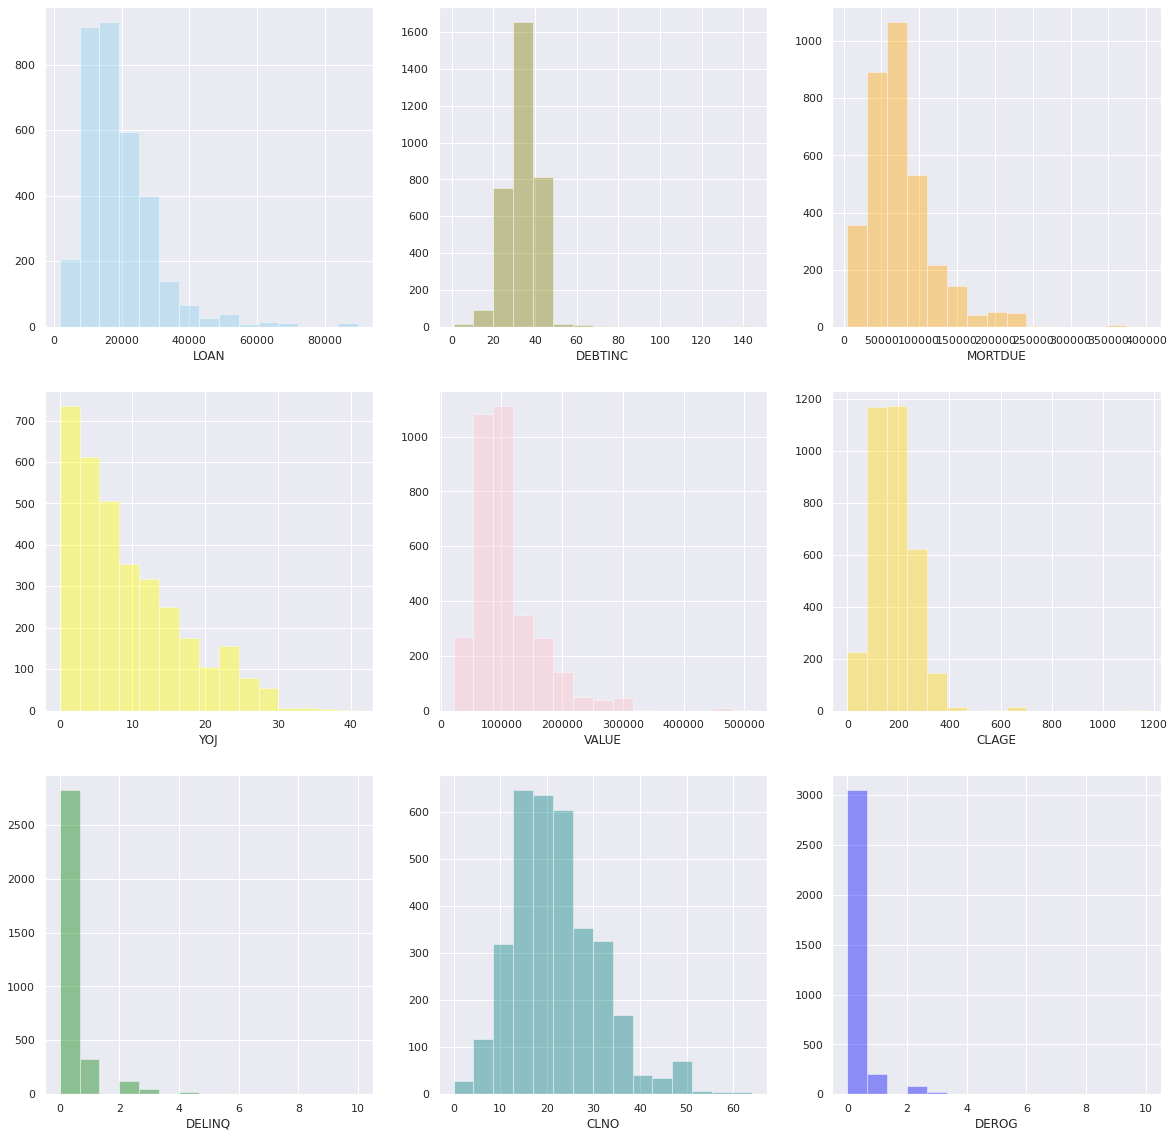

In [15]:
# visualizing numeric variables using seaborn
f, axes = plt.subplots(3,3, figsize=(20,20))
sns.distplot( df["LOAN"] , color="skyblue", bins=15, kde=False, ax=axes[0, 0])
sns.distplot( df["DEBTINC"] , color="olive", bins=15, kde=False, ax=axes[0, 1])
sns.distplot( df["MORTDUE"] , color="orange", bins=15, kde=False, ax=axes[0, 2])
sns.distplot( df["YOJ"] , color="yellow", bins=15, kde=False, ax=axes[1, 0])
sns.distplot( df["VALUE"] , color="pink", bins=15, kde=False, ax=axes[1, 1])
sns.distplot( df["CLAGE"] , color="gold", bins=15, kde=False, ax=axes[1, 2])
sns.distplot( df["CLNO"] , color="teal", bins=15, kde=False, ax=axes[2, 1])
sns.distplot( df['DEROG'], color="blue", bins=15, kde=False, ax=axes[2, 2])
sns.distplot( df['DELINQ'], color="green", bins=15, kde=False, ax=axes[2, 0])

1. **Análises das variáveis númericas - Gráficos de Histograma **
* As variáveis quantitativas demosntram em todos os casos distruíção assimétrica a esquerda.
* Variável LOAN - Os valores dos empréstimos estão concentrados até 20.000,00, com alguns valores extremos acima de 80.000,00
* Variável DEBTINC - que é a razão entre a dívida e o rendimento ou seja a capacidade de pagamento, possui mais concentração entre 30 e 40.
* Variável MORTDUE - que verifica o valor devido da hipóteca, mostra que a maioria dos clientes posseum dívidas que variam entre 40.000 e 80.000
* Variável YOJ - Verifica os anos que trabalha no emprego atual. A maioria trabalha até 5 anos na empresa, alguns clientes trabalham a mais de 40 anos (número fora do padrão)
* Variável VALUE - Que verifica os valores dos imóveis demonstra que a maioria dos imóveis estão avaliados entre 50.000 e 100.000, existindo casos de imóveis acima de 400.000
* Variável CLAGE - verifica a idade em meses da mais da linha de crédito, a concentração está entre 100 e 300 meses (entre 8 e 25 anos) em que adquiriu a primeira linha de crédito. 
* Variável CLNO - verifica quantas linhas de crédito o cliente possui. A maioria possui entre 10 e 25 linhas de crédito. 
* Variável DEROG - quantidade relatórios depreciativos a concentração está entre 1 e 3.
* Variável DELINQ - Quantidade de linhas de crédito inadimplentes concentram-se entre 0 e 3.

* Para as próximas análises será criado variáveis Dummies com objetivo de melhorar a base de dados nas predições que serão realizadas. 

In [16]:
# Criar variáveis Dummies
Dum_df = pd.get_dummies(df)
print(Dum_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 20 columns):
BAD               3364 non-null int64
LOAN              3364 non-null int64
MORTDUE           3364 non-null float64
VALUE             3364 non-null float64
YOJ               3364 non-null float64
DEROG             3364 non-null float64
DELINQ            3364 non-null float64
CLAGE             3364 non-null float64
NINQ              3364 non-null float64
CLNO              3364 non-null float64
DEBTINC           3364 non-null float64
VALUE_MORTDUE     3364 non-null float64
REASON_DebtCon    3364 non-null uint8
REASON_HomeImp    3364 non-null uint8
JOB_Mgr           3364 non-null uint8
JOB_Office        3364 non-null uint8
JOB_Other         3364 non-null uint8
JOB_ProfExe       3364 non-null uint8
JOB_Sales         3364 non-null uint8
JOB_Self          3364 non-null uint8
dtypes: float64(10), int64(2), uint8(8)
memory usage: 527.9 KB
None


A variável **VALUE_MORTDUE** foi criada para verificar se existe saldo suficiente sobre o valor do imóvel (VALUE) caso seja necessário executar o valor da hipóteca (MORTDUE).

No gráfico de boxplot observou-se que a média do saldo do imóvel está em torno de 20.000. 
Existem valores extremos negativos, que significa que o valor do imóvel não é suficiente para pagar a hipoteca e valores extremos positivos mostram que os valores dos imóveis é superior ao valor da hipoteca.

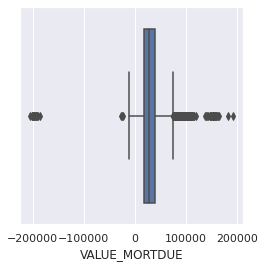

In [17]:
ax = sns.boxplot(x="VALUE_MORTDUE", data=Dum_df)

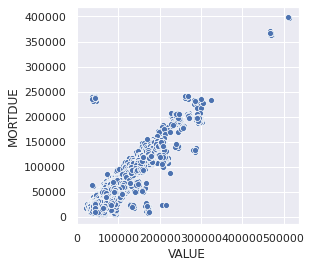

In [18]:
import seaborn as sns

sns.scatterplot(data=Dum_df, x='VALUE', y='MORTDUE')

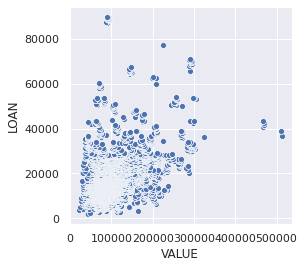

In [19]:
sns.scatterplot(data=Dum_df, x='VALUE', y='LOAN')

# **Gráficos de Correlação**

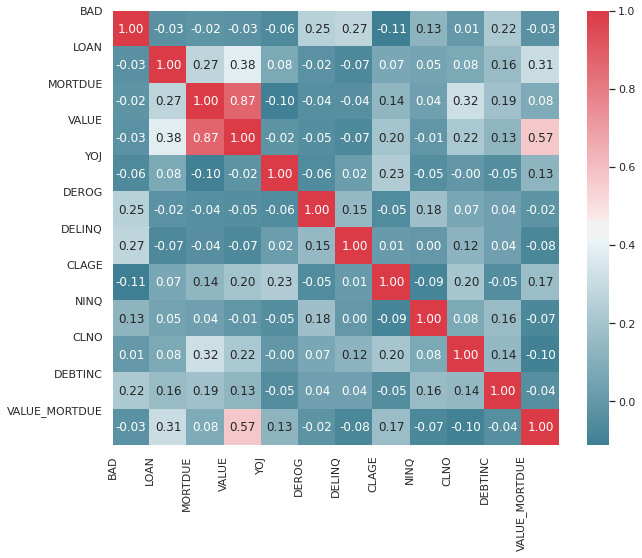

In [20]:
#Base sem Dummies
corr = df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

No gráfico de correlação antes da criação das variáveis dummies mostra uma correlação forte entre as variáveis "MORTDUE" e "VALUE" em relação a variável target BAD.

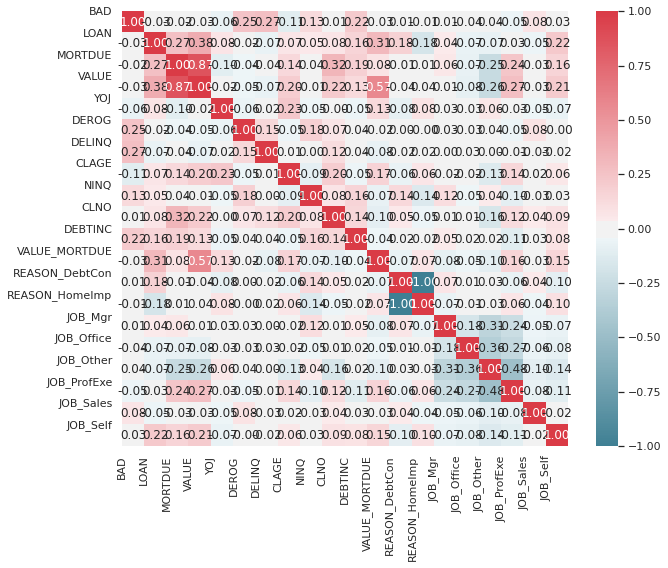

In [21]:
#Base com Dummies
corr = Dum_df.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10,8))
#Generate Color Map
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Após a criação das variáveis dummies percebe-se uma melhora na correlação das variáveis LOAN YOJ, continuando mostrar correlação forte entre VALUE e LOAN.

# **Modelos estatísticos**

Para a aplicação dos modelos estatísticos a base de dados será dividida entre teste e treino. 
1. Serão aplicados os modelos de RandomForestClassifier, cross_val_score, XGBoost e GradientBoostingClassifier. Com o objetivo de verificar se o modelo é capaz de auxiliar na tomada de decisão de conceder ou não o crédito.

In [22]:
# Dividindo o DataFrame
from sklearn.model_selection import train_test_split

# Treino e teste
train, test = train_test_split(Dum_df, test_size=0.15, random_state=42)

# Veificando o tanho dos DataFrames
train.shape, test.shape



((2859, 20), (505, 20))

In [23]:
Dum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 20 columns):
BAD               3364 non-null int64
LOAN              3364 non-null int64
MORTDUE           3364 non-null float64
VALUE             3364 non-null float64
YOJ               3364 non-null float64
DEROG             3364 non-null float64
DELINQ            3364 non-null float64
CLAGE             3364 non-null float64
NINQ              3364 non-null float64
CLNO              3364 non-null float64
DEBTINC           3364 non-null float64
VALUE_MORTDUE     3364 non-null float64
REASON_DebtCon    3364 non-null uint8
REASON_HomeImp    3364 non-null uint8
JOB_Mgr           3364 non-null uint8
JOB_Office        3364 non-null uint8
JOB_Other         3364 non-null uint8
JOB_ProfExe       3364 non-null uint8
JOB_Sales         3364 non-null uint8
JOB_Self          3364 non-null uint8
dtypes: float64(10), int64(2), uint8(8)
memory usage: 527.9 KB


In [24]:
# Selecionado as features
feats = [c for c in Dum_df.columns if c not in ['BAD']]

In [25]:
Dum_df.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,VALUE_MORTDUE,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
5,1,1700,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614,9772.0,0,1,0,0,1,0,0,0
7,1,1800,28502.0,43034.0,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894,14532.0,0,1,0,0,1,0,0,0
19,0,2300,102370.0,120953.0,2.0,0.0,0.0,90.992533,0.0,13.0,31.588503,18583.0,0,1,0,1,0,0,0,0
25,1,2400,34863.0,47471.0,12.0,0.0,0.0,70.491080,1.0,21.0,38.263601,12608.0,0,1,1,0,0,0,0,0
26,0,2400,98449.0,117195.0,4.0,0.0,0.0,93.811775,0.0,13.0,29.681827,18746.0,0,1,0,1,0,0,0,0


In [26]:
# Trabalhando com RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=200, min_samples_split=5, max_depth=4, random_state=42)
rf.fit(train[feats], train['BAD'])
accuracy_score(test['BAD'], rf.predict(test[feats]))

0.9267326732673268

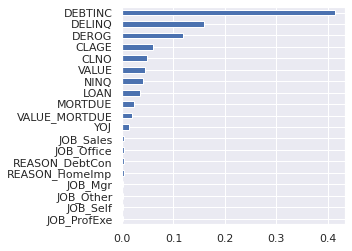

In [27]:
# Feature Importance com RF
pd.Series(rf.feature_importances_, index=feats).sort_values().plot.barh()

In [28]:
# Usar o cross validation
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf, train[feats], train['BAD'], n_jobs=-1, cv=5)

scores, scores.mean()

(array([0.94055944, 0.93356643, 0.92832168, 0.93531469, 0.93345009]),
 0.9342424650655824)

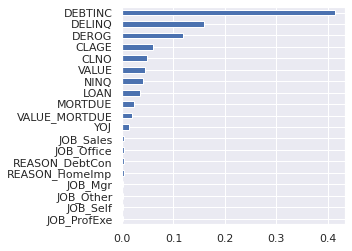

In [29]:
# Feature Importance com RF
pd.Series(rf.feature_importances_, index=feats).sort_values().plot.barh()

In [30]:
# Trabalhando com XGBoost
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200, learning_rate=0.09, random_state=42)
xgb.fit(train[feats], train['BAD'])
accuracy_score(test['BAD'], xgb.predict(test[feats]))

0.9504950495049505

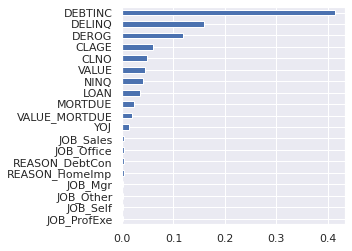

In [31]:
# Feature Importance com RF
pd.Series(rf.feature_importances_, index=feats).sort_values().plot.barh()

In [32]:
# Trabalhando com GBM
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier(n_estimators=200, learning_rate=1.0, max_depth=1, random_state=42)
gbm.fit(train[feats], train['BAD'])
accuracy_score(test['BAD'], gbm.predict(test[feats]))

0.9267326732673268

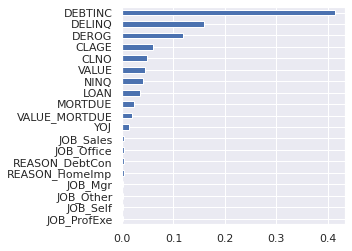

In [33]:
# Feature Importance com RF
pd.Series(rf.feature_importances_, index=feats).sort_values().plot.barh()

In [34]:
print("cross validation - ", scores, scores.mean())
print("RandomForest - ",accuracy_score(test['BAD'], rf.predict(test[feats])))
print("GBM - ",accuracy_score(test['BAD'], gbm.predict(test[feats])))
print("XGBoost - ",accuracy_score(test['BAD'], xgb.predict(test[feats])))

cross validation -  [0.94055944 0.93356643 0.92832168 0.93531469 0.93345009] 0.9342424650655824
RandomForest -  0.9267326732673268
GBM -  0.9267326732673268
XGBoost -  0.9504950495049505


Nas análises de acima o algoritmo que melhor explica o modelo é XGBoost com 95% de acurácia.

Outra metodologia aplicada será a clusterização, o primeiro passo será selecionar as variáveis, para isso considerou o gráfico de correlação. As variáveis escolhidas foram 'MORTDUE', 'LOAN' e 'YOJ'. O objetivo é determinar a quantidade de clusters (grupos) necessários para explicar o modelo. 

# **Clusterização**

In [35]:
# Determinando a quantidade de clusters

# Importando o k-means
from sklearn.cluster import KMeans

# Selecionando as variaveis para utilizar no modelo.
X= Dum_df[['MORTDUE','LOAN', 'YOJ']]

# Cálculo do SSE - Sum of Squared Erros
sse = []

for k in range (1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    sse.append(kmeans.inertia_)
print(sse)

[7236730140674.396, 3165676574222.9277, 1880148099613.0442, 1276886938605.8481, 986420029352.8599, 737364990918.5068, 605704334368.9009, 485236282970.4873, 424271776921.6346, 375698983364.8556, 346109763378.6548]


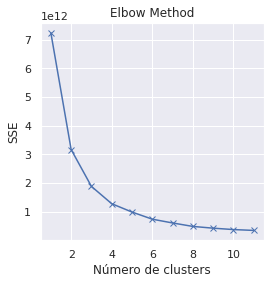

In [36]:
# Definindo a quantidade clusters utilizando o método Elbow 
import matplotlib.pyplot as plt

plt.plot(range(1, 12), sse, 'bx-')
plt.title('Elbow Method')
plt.xlabel('Número de clusters')
plt.ylabel('SSE')
plt.show()

O gráfico do modelo "Gráfico de Cotovelo" mostrou que o número bom de clusters é 4, uma vez que de 1 a 3 teríamos poucos agrupamentos, ou seja, a informação estaria muito concentrada e de 5 a 6 os agrupamentos estariam muitos dispersos. 

In [37]:
# Excecutando a clusterização com 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_id = kmeans.fit_predict(X)
cluster_id

array([2, 2, 3, ..., 2, 2, 2], dtype=int32)

In [38]:
# Guardar os resultados no dataframe
X['cluster_id'] = cluster_id

#veficando o tamanho do DF
X.sample(10)



/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MORTDUE,LOAN,YOJ,cluster_id
4277,34326.0,22300,6.0,2
4114,135899.0,21500,18.0,3
4279,59809.0,22300,2.0,0
2364,67018.0,14300,1.0,0
1951,66293.0,12800,27.0,0
4436,48003.0,23000,4.0,2
2825,51163.0,15800,19.0,2
5502,73877.0,33700,10.0,0
5029,23361.0,26700,36.0,2
4282,60513.0,22300,15.0,0


In [39]:
X.head()

,MORTDUE,LOAN,YOJ,cluster_id
5,30548.0,1700,9.0,2
7,28502.0,1800,11.0,2
19,102370.0,2300,2.0,3
25,34863.0,2400,12.0,2
26,98449.0,2400,4.0,0


Verifica-se que o cluster 2 possui um maior numero de iformações.

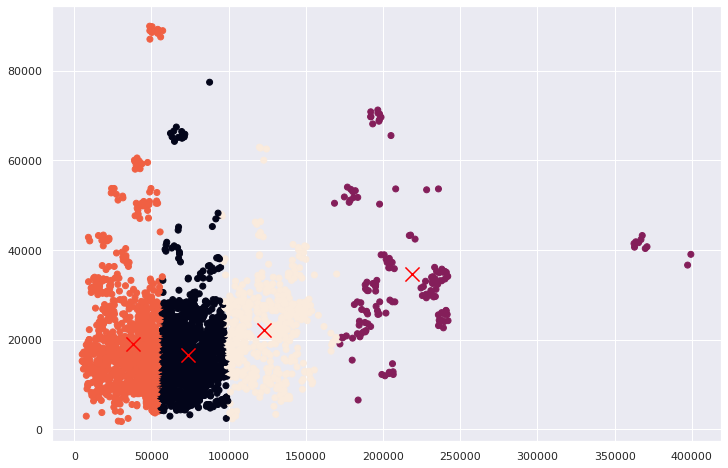

In [40]:
# Plotando os agrupamentos e os centroídes
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='red', marker="x", s=200)
plt.show()


Os grupos são agrupados por suas similaridades baseado no conceito de distância, a técnica consiste em atribuir um centróide a cada elemento, em seguida, utilizando a distância euclidiana, calcula-se as distâncias de cada elemento, e divide os centróides de acordo com o número de clustes, nesse caso 4.
A partir de então,uUma vez que os pontos foram atribuídos aos clusters conforme sua distância, recalcula-se o valor dos centróide, então é calculada a média dos valores dos pontos de dados de cada cluster e o valor médio será o novo centróide. E a partir do centróide são calculadas as distâncias de cada elemento e agrupando aqueles com maior próximidade. 
Atavés dessa técnica verificamos que os grupos laranja e preto tiveram uma quantidade de elementos com menor distância, tornan-se grupos maiores e dois grupos com quantidade menor de elementos por esses elementos estarem mais distantes dos centróides. 



In [41]:
Dum_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364 entries, 5 to 5959
Data columns (total 20 columns):
BAD               3364 non-null int64
LOAN              3364 non-null int64
MORTDUE           3364 non-null float64
VALUE             3364 non-null float64
YOJ               3364 non-null float64
DEROG             3364 non-null float64
DELINQ            3364 non-null float64
CLAGE             3364 non-null float64
NINQ              3364 non-null float64
CLNO              3364 non-null float64
DEBTINC           3364 non-null float64
VALUE_MORTDUE     3364 non-null float64
REASON_DebtCon    3364 non-null uint8
REASON_HomeImp    3364 non-null uint8
JOB_Mgr           3364 non-null uint8
JOB_Office        3364 non-null uint8
JOB_Other         3364 non-null uint8
JOB_ProfExe       3364 non-null uint8
JOB_Sales         3364 non-null uint8
JOB_Self          3364 non-null uint8
dtypes: float64(10), int64(2), uint8(8)
memory usage: 527.9 KB


# **Modelo de Regressão Logística**


In [42]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc

#Utilizando o statsmodels
#Verificar as chances de um cliente ser inadimplente em função das variáveis LOAN + YOJ + MORTDUE (Valor do empréstimo, ocupação e o valor da hipoteca)
#BAD = 1 (Cliente Inadimplente)
#BAD = 2 (Cliente adimplente)

modelo = smf.glm(formula='BAD ~ LOAN + YOJ + MORTDUE', data=Dum_df,
                family = sm.families.Binomial()).fit()
print(modelo.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                    BAD   No. Observations:                 3364
Model:                            GLM   Df Residuals:                     3360
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1002.2
Date:                Tue, 14 Apr 2020   Deviance:                       2004.5
Time:                        21:05:53   Pearson chi2:                 3.39e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8013      0.165    -10.928      0.0

In [43]:
#gerar osdados em percentuais relativos de chances de inadimplencia
print(np.exp(modelo.params[1:]))

LOAN       0.999992
YOJ        0.967883
MORTDUE    0.999999
dtype: float64


In [44]:
(np.exp(modelo.params[1:]) -1) * 100


LOAN      -0.000775
YOJ       -3.211738
MORTDUE   -0.000139
dtype: float64

Para a regressão logistica foi utilizada a base com a criação das variáveis dummies. 
Todos os coeficientes foram estatísticamente significativos para o modelo, pois o p-valor foi abaixo do nível de significância de 5%.
A chance de um cliente ser inadimplente é de 99% se for considerado o montande do empréstimo LOAN, 96% está associado a ocupação YOJ e 99% ao valor devido da hipoteca MORTDUE. 


In [45]:
# Agora vamos fazer com sklearn para aproveitar as métricas
model1 = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = Dum_df[['LOAN', 'YOJ', 'MORTDUE']].dropna()
y = Dum_df.BAD
X = pd.get_dummies(Dum_df[['LOAN', 'YOJ', 'MORTDUE']], drop_first=True)
print(X)

       LOAN   YOJ   MORTDUE
5      1700   9.0   30548.0
7      1800  11.0   28502.0
19     2300   2.0  102370.0
25     2400  12.0   34863.0
26     2400   4.0   98449.0
...     ...   ...       ...
5955  88900  16.0   57264.0
5956  89000  16.0   54576.0
5957  89200  15.0   54045.0
5958  89800  14.0   50370.0
5959  89900  15.0   48811.0

[3364 rows x 3 columns]


In [46]:
model1.fit(X, y)

/opt/conda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/conda/lib/python3.6/site-packages/scipy/optimize/linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
#Aplicando a Regressão logística com sklearn
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
print(model1.coef_) 

[[-7.93790699e-06 -3.28545281e-02 -1.43880633e-06]]


In [49]:
# Predizendo as probabilidades
yhat = model1.predict_proba(X)


In [50]:
# manter somente para a classe positiva
yhat = yhat[:, 1] 

In [51]:
# usando a função do sklearn
confusion_matrix(y, model1.predict(X)) 

array([[3064,    0],
       [ 300,    0]])

In [52]:
#imprimindo a matriz de confusão
pd.crosstab(y, model1.predict(X))  

col_0,0
BAD,
0,3064
1,300


In [53]:
acuracia = accuracy_score(y, model1.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

O modelo obteve 0.9108 de acurácia.
